# ЛАБОРАТОРНАЯ РАБОТА №3

## Выполнили: Рогозян Анастасия и Дробот Елизавета

Сначала мы загружаем нужные нам библиотека для работы с сайтом YahooFinancials. Подключаем библиотеки через import.

In [1]:
pip install YahooFinancials

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pathlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ruamel-yaml

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
from numpy import inf 
import pylab
import pandas as pd
import yfinance as yf
import numpy as np
from yahoofinancials import YahooFinancials
import datetime
import matplotlib.pyplot as plt
import copy
import math
import scipy
import scipy.stats
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2017,12,31)
import seaborn as sns
from scipy.spatial.distance import cityblock
import warnings
from random import randint
from scipy.optimize import minimize
from matplotlib.ticker import ScalarFormatter
warnings.filterwarnings('ignore')

from IPython.display import clear_output

Загружаем файл, в который заранее скачали информацию обо всех акциях биржи Индийского фонда.

In [6]:
companies = pd.read_csv("resalt.csv")
companies

,Название,Тикер,Биржа,Cектор,Изм.%
0,3P Land,3PLA,NSE,Недвижимость,"-0,88"
1,3rd Rock Multimedia Ltd,3RDR,NSE,Услуги связи,0
2,63 Moons Tech,63MO,NSE,Информационные технологии,"4,14"
3,A2z Infra Engineering,A2ZI,NSE,Промышленность,"-3,96"
4,AAA Technologies,AAAH,NSE,Информационные технологии,"1,47"
...,...,...,...,...,...
2061,Zota Health Care,ZOTA,NSE,Здравоохранение,"-1,75"
2062,Zuari Agro Chemicals Ltd,ZUAR,NSE,Материалы,"2,03"
2063,Zuari Industries,ZURI,NSE,Производители товаров массового потребления,"0,3"
2064,Zydus Wellness,ZYDS,NSE,Производители товаров массового потребления,"-0,96"


Из файла выше нам понадобятся тикеры компаний.

In [7]:
Symbols = companies['Тикер'].tolist()
Symbols.sort()
Symbols

['3PLA',
 '3RDR',
 '63MO',
 'A2ZI',
 'AAAH',
 'AAAI',
 'AADM',
 'AAKA',
 'AARI',
 'AARN',
 'AARU',
 'ABAN',
 'ABB',
 'ABCO',
 'ABDL',
 'ABHE',
 'ABIN',
 'ABML',
 'ABMN',
 'ABMT',
 'ABOT',
 'ABUJ',
 'ACC',
 'ACCO',
 'ACCU',
 'ACCY',
 'ACEL',
 'ACEN',
 'ACLL',
 'ACPL',
 'ACRI',
 'ADAG',
 'ADAI',
 'ADAN',
 'ADAW',
 'ADEL',
 'ADEN',
 'ADHO',
 'ADIA',
 'ADIE',
 'ADIS',
 'ADNA',
 'ADOR',
 'ADPH',
 'ADRG',
 'ADTB',
 'AEGS',
 'AETH',
 'AFFL',
 'AGIG',
 'AGRO',
 'AGRP',
 'AGST',
 'AGTL',
 'AGWL',
 'AHFN',
 'AHIN',
 'AHLA',
 'AHLU',
 'AIAE',
 'AIRA',
 'AIRO',
 'AISG',
 'AJAN',
 'AJME',
 'AJOO',
 'AJPH',
 'AJRI',
 'AKAS',
 'AKGE',
 'AKSH',
 'AKSO',
 'AKZO',
 'ALAK',
 'ALBD',
 'ALCL',
 'ALEM',
 'ALIO',
 'ALKE',
 'ALKY',
 'ALLS',
 'ALMC',
 'ALML',
 'ALOK',
 'ALPA',
 'ALPI',
 'ALPS',
 'ALSL',
 'AMAR',
 'AMBE',
 'AMBK',
 'AMBN',
 'AMDM',
 'AMIO',
 'AMJL',
 'AMJU',
 'AMPL',
 'AMRN',
 'AMSP',
 'ANAA',
 'ANCM',
 'ANDA',
 'ANDC',
 'ANDS',
 'ANDY',
 'ANGO',
 'ANII',
 'ANIK',
 'ANMI',
 'ANRA',
 'ANSL',
 'A

In [8]:
# Создаем пустой DataFrame
stock_final = pd.DataFrame()
# перебираем каждый символ
for i in Symbols:  
    
    # печатаем символ, который загружается
    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # скачиваем ценеу акции
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)
        
        # добавляем цены отдельных акций
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None

0 : 3PLA,
1 Failed download:
- 3PLA: No data found for this date range, symbol may be delisted
1 : 3RDR,
1 Failed download:
- 3RDR: No data found for this date range, symbol may be delisted
2 : 63MO,
1 Failed download:
- 63MO: No data found for this date range, symbol may be delisted
3 : A2ZI,
1 Failed download:
- A2ZI: No data found for this date range, symbol may be delisted
4 : AAAH,
1 Failed download:
- AAAH: No data found for this date range, symbol may be delisted
5 : AAAI,
1 Failed download:
- AAAI: No data found for this date range, symbol may be delisted
6 : AADM,
1 Failed download:
- AADM: No data found for this date range, symbol may be delisted
7 : AAKA,
1 Failed download:
- AAKA: No data found for this date range, symbol may be delisted
8 : AARI,
1 Failed download:
- AARI: No data found for this date range, symbol may be delisted
9 : AARN,
1 Failed download:
- AARN: No data found for this date range, symbol may be delisted
10 : AARU,
1 Failed download:
- AARU: No data foun

99 : ANAA,
1 Failed download:
- ANAA: No data found for this date range, symbol may be delisted
100 : ANCM,
1 Failed download:
- ANCM: No data found for this date range, symbol may be delisted
101 : ANDA,
1 Failed download:
- ANDA: No data found for this date range, symbol may be delisted
102 : ANDC,
1 Failed download:
- ANDC: Data doesn't exist for startDate = 1483246800, endDate = 1514696400
103 : ANDS,
1 Failed download:
- ANDS: No data found for this date range, symbol may be delisted
104 : ANDY,
1 Failed download:
- ANDY: No data found for this date range, symbol may be delisted
105 : ANGO,106 : ANII,
1 Failed download:
- ANII: No data found for this date range, symbol may be delisted
107 : ANIK,108 : ANMI,
1 Failed download:
- ANMI: No data found for this date range, symbol may be delisted
109 : ANRA,
1 Failed download:
- ANRA: No data found for this date range, symbol may be delisted
110 : ANSL,
1 Failed download:
- ANSL: No data found for this date range, symbol may be delisted

195 : AYMS,
1 Failed download:
- AYMS: No data found for this date range, symbol may be delisted
196 : BACH,
1 Failed download:
- BACH: No data found for this date range, symbol may be delisted
197 : BACO,
1 Failed download:
- BACO: No data found for this date range, symbol may be delisted
198 : BAFP,
1 Failed download:
- BAFP: No data found for this date range, symbol may be delisted
199 : BAGF,
1 Failed download:
- BAGF: No data found for this date range, symbol may be delisted
200 : BAJA,
1 Failed download:
- BAJA: No data found for this date range, symbol may be delisted
201 : BAJE,
1 Failed download:
- BAJE: No data found for this date range, symbol may be delisted
202 : BAJH,
1 Failed download:
- BAJH: No data found for this date range, symbol may be delisted
203 : BAKN,
1 Failed download:
- BAKN: No data found for this date range, symbol may be delisted
204 : BALK,
1 Failed download:
- BALK: No data found for this date range, symbol may be delisted
205 : BALP,
1 Failed download:

Exception in thread Thread-282:
Traceback (most recent call last):
  File "D:\anaconda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\anaconda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "D:\anaconda\lib\site-packages\multitasking\__init__.py", line 104, in _run_via_pool
    return callee(*args, **kwargs)
  File "D:\anaconda\lib\site-packages\yfinance\multi.py", line 191, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "D:\anaconda\lib\site-packages\yfinance\multi.py", line 205, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "D:\anaconda\lib\site-packages\yfinance\base.py", line 168, in history
    end = utils._parse_user_dt(end, tz)
  File "D:\anaconda\lib\site-packages\yfinance\utils.py", line 154, in _parse_user_dt
    dt = _tz.timezone(exchange_tz).localize(dt)
  File "D:\anaconda\lib\site-packages\pytz\__init_

KeyboardInterrupt: 

In [64]:
index = yf.download('^NSEI',start=start, end=end, progress=False)

In [65]:
stock_final.to_csv('data.csv')
index.to_csv('index.csv')

t_len = len(Symbols) - 1
d_len = len(set(stock_final['Name']))
print(f'Всего найдено акций {t_len} из них скачано {d_len}')

Всего найдено акций 2065 из них скачано 32


In [66]:
data = pd.read_csv('data.csv')
index = pd.read_csv('index.csv')

data = data.drop(columns = ['Low', 'High', 'Open', 'Close'])
index = index.drop(columns = ['Low', 'High', 'Open', 'Close'])


In [67]:
data["Name"]

0        ABB
1        ABB
2        ABB
3        ABB
4        ABB
        ... 
7229    BIOF
7230    BIOF
7231    BIOF
7232    BIOF
7233    BIOF
Name: Name, Length: 7234, dtype: object

In [68]:
adj_close = pd.DataFrame() # скорректированная цена закрытия
adj_close = data.drop(columns = ['Volume'])
adj_close = (adj_close.assign(idx=adj_close.groupby('Name').cumcount())
                 .pivot_table(index='Date', columns='Name', 
                              values='Adj Close', aggfunc='sum'))
adj_close.reset_index(level=0, inplace=True)

adj_close = adj_close.dropna(axis=1, how='any') # удаляем пропущенные значения

adj_close['NSEI'] = index['Adj Close'] # добавляем данные индекса

adj_close

Name,Date,ABB,ABML,ABMT,ACCO,ADIA,AFFL,AGRO,ALMC,AMBK,...,ASAL,ASPN,ASTE,ASTO,AVNT,AVRI,BCPC,BFIN,BIOF,NSEI
0,2017-01-03 00:00:00-05:00,17.302444,0.190,0.15,11.178239,0.003,0.00010,10.601215,0.75,10.160049,...,5.0,4.25,64.608055,3.0,28.652849,0.00150,81.160172,12.343029,0.196,8179.500000
1,2017-01-04 00:00:00-05:00,17.375626,0.190,0.15,11.432288,0.003,0.00010,10.572171,0.75,10.160049,...,5.0,4.35,65.550690,3.0,29.430357,0.00150,82.641846,12.532544,0.196,8192.250000
2,2017-01-05 00:00:00-05:00,17.530107,0.190,0.15,11.262923,0.003,0.00010,10.446312,0.83,9.832306,...,5.0,4.26,63.901085,3.0,28.944418,0.00150,81.871765,12.285353,0.190,8190.500000
3,2017-01-06 00:00:00-05:00,17.562634,0.200,0.15,11.135895,0.003,0.00010,10.262364,0.83,9.832306,...,5.0,4.16,63.787971,3.0,29.023930,0.00150,80.906731,12.375990,0.220,8273.799805
4,2017-01-09 00:00:00-05:00,17.481325,0.235,0.15,10.797161,0.003,0.00010,10.272045,0.83,9.832306,...,5.0,4.21,62.666241,3.0,28.591003,0.00150,80.916489,12.260633,0.220,8243.799805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2017-12-22 00:00:00-05:00,22.367104,0.104,0.13,10.670136,0.006,0.00001,9.865423,13.00,9.527717,...,5.0,4.89,54.415348,5.1,39.020096,0.00699,79.064392,13.194259,0.028,10477.900391
247,2017-12-26 00:00:00-05:00,22.417553,0.103,0.13,10.797161,0.006,0.00001,10.000964,13.00,9.527717,...,5.0,4.82,54.102020,5.1,39.100830,0.00699,78.113945,13.009608,0.030,10530.700195
248,2017-12-27 00:00:00-05:00,22.484823,0.100,0.15,10.797161,0.006,0.00001,9.952557,15.00,9.653633,...,5.0,4.80,54.358368,5.1,39.298168,0.00699,77.790588,12.883707,0.029,NaN
249,2017-12-28 00:00:00-05:00,22.543686,0.085,0.15,10.797161,0.005,0.00001,10.049372,20.00,9.653633,...,5.0,4.94,54.966045,5.1,39.450668,0.00699,78.486282,13.085145,0.028,NaN


In [69]:
tickers = list(adj_close.columns)[1:] # создаем лист с тикерами
tickers

['ABB',
 'ABML',
 'ABMT',
 'ACCO',
 'ADIA',
 'AFFL',
 'AGRO',
 'ALMC',
 'AMBK',
 'AMJL',
 'AMRN',
 'ANGO',
 'ANIK',
 'APLO',
 'APTS',
 'ARCO',
 'ASAL',
 'ASPN',
 'ASTE',
 'ASTO',
 'AVNT',
 'AVRI',
 'BCPC',
 'BFIN',
 'BIOF',
 'NSEI']

In [70]:
log_returns50 = pd.DataFrame()
log_returns50['Date'] = adj_close['Date']

days = len(log_returns50['Date'])
for ticker in tickers:
    for i in range(1, days):
        log_returns50.loc[i, ticker] = np.log(adj_close.loc[i, ticker]/adj_close.loc[i-1, ticker])

log_returns50 = log_returns50.drop([0])

log_returns50

,Date,ABB,ABML,ABMT,ACCO,ADIA,AFFL,AGRO,ALMC,AMBK,...,ASAL,ASPN,ASTE,ASTO,AVNT,AVRI,BCPC,BFIN,BIOF,NSEI
1,2017-01-04 00:00:00-05:00,0.004221,0.000000,0.000000,0.022473,0.000000,0.0,-0.002743,0.000000,0.000000,...,0.0,0.023257,0.014485,0.0,0.026774,0.0,0.018092,0.015237,0.000000,0.001558
2,2017-01-05 00:00:00-05:00,0.008851,0.000000,0.000000,-0.014925,0.000000,0.0,-0.011976,0.101352,-0.032790,...,0.0,-0.020907,-0.025487,0.0,-0.016649,0.0,-0.009362,-0.019921,-0.031091,-0.000214
3,2017-01-06 00:00:00-05:00,0.001854,0.051293,0.000000,-0.011343,0.000000,0.0,-0.017766,0.000000,0.000000,...,0.0,-0.023754,-0.001772,0.0,0.002743,0.0,-0.011857,0.007351,0.146603,0.010119
4,2017-01-09 00:00:00-05:00,-0.004640,0.161268,0.000000,-0.030890,0.000000,0.0,0.000943,0.000000,0.000000,...,0.0,0.011948,-0.017742,0.0,-0.015029,0.0,0.000121,-0.009365,0.000000,-0.003632
5,2017-01-10 00:00:00-05:00,0.027525,0.175204,0.000000,0.019418,0.000000,0.0,0.012178,-0.024391,0.000000,...,0.0,0.002372,0.016263,0.0,0.004009,0.0,-0.003862,-0.017627,0.000000,-0.000941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2017-12-22 00:00:00-05:00,-0.000376,0.029270,0.000000,0.000000,0.000000,0.0,0.002948,0.000000,0.030414,...,0.0,-0.008147,0.007004,0.0,-0.007329,0.0,-0.006391,-0.006341,-0.035091,-0.001226
247,2017-12-26 00:00:00-05:00,0.002253,-0.009662,0.000000,0.011834,0.000000,0.0,0.013645,0.000000,0.000000,...,0.0,-0.014418,-0.005775,0.0,0.002067,0.0,-0.012094,-0.014094,0.068993,0.005027
248,2017-12-27 00:00:00-05:00,0.002996,-0.029559,0.143101,0.000000,0.000000,0.0,-0.004852,0.143101,0.013129,...,0.0,-0.004158,0.004727,0.0,0.005034,0.0,-0.004148,-0.009725,-0.033902,NaN
249,2017-12-28 00:00:00-05:00,0.002614,-0.162519,0.000000,0.000000,-0.182322,0.0,0.009681,0.287682,0.000000,...,0.0,0.028749,0.011117,0.0,0.003873,0.0,0.008903,0.015514,-0.035091,NaN


In [71]:
log_returns50.drop(columns=['ABMT'], axis = 1, inplace = True)
log_returns50.drop(columns=['ADIA'], axis = 1, inplace = True)
log_returns50.drop(columns=['AFFL'], axis = 1, inplace = True)
log_returns50.drop(columns=['ASAL'], axis = 1, inplace = True)
log_returns50.drop(columns=['ASTO'], axis = 1, inplace = True)
log_returns50.drop(columns=['AVRI'], axis = 1, inplace = True)
log_returns50.drop(columns=['NSEI'], axis = 1, inplace = True)
#log_returns50.drop(columns=['APLO'], axis = 1, inplace = True)
log_returns50 

,Date,ABB,ABML,ACCO,AGRO,ALMC,AMBK,AMJL,AMRN,ANGO,ANIK,APLO,APTS,ARCO,ASPN,ASTE,AVNT,BCPC,BFIN,BIOF
1,2017-01-04 00:00:00-05:00,0.004221,0.000000,0.022473,-0.002743,0.000000,0.000000,-0.020095,0.012862,0.006589,0.012494,0.0,-0.017736,-0.008734,0.023257,0.014485,0.026774,0.018092,0.015237,0.000000
2,2017-01-05 00:00:00-05:00,0.008851,0.000000,-0.014925,-0.011976,0.101352,-0.032790,0.000000,-0.022618,-0.002391,-0.008113,0.0,-0.000688,-0.008811,-0.020907,-0.025487,-0.016649,-0.009362,-0.019921,-0.031091
3,2017-01-06 00:00:00-05:00,0.001854,0.051293,-0.011343,-0.017766,0.000000,0.000000,0.000000,-0.019803,0.002391,0.009492,0.0,-0.008299,0.000000,-0.023754,-0.001772,0.002743,-0.011857,0.007351,0.146603
4,2017-01-09 00:00:00-05:00,-0.004640,0.161268,-0.030890,0.000943,0.000000,0.000000,0.028101,0.016529,0.014815,-0.001182,0.0,-0.003478,-0.008889,0.011948,-0.017742,-0.015029,0.000121,-0.009365,0.000000
5,2017-01-10 00:00:00-05:00,0.027525,0.175204,0.019418,0.012178,-0.024391,0.000000,-0.023885,-0.006579,0.026126,0.000591,0.0,-0.005590,0.017700,0.002372,0.016263,0.004009,-0.003862,-0.017627,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2017-12-22 00:00:00-05:00,-0.000376,0.029270,0.000000,0.002948,0.000000,0.030414,0.018742,0.032301,-0.005995,0.001533,0.0,-0.009357,0.004914,-0.008147,0.007004,-0.007329,-0.006391,-0.006341,-0.035091
247,2017-12-26 00:00:00-05:00,0.002253,-0.009662,0.011834,0.013645,0.000000,0.000000,0.022166,0.000000,0.001202,0.004204,0.0,0.005428,-0.004914,-0.014418,-0.005775,0.002067,-0.012094,-0.014094,0.068993
248,2017-12-27 00:00:00-05:00,0.002996,-0.029559,0.000000,-0.004852,0.143101,0.013129,-0.013711,-0.022251,-0.001803,0.014953,0.0,0.005399,0.014670,-0.004158,0.004727,0.005034,-0.004148,-0.009725,-0.033902
249,2017-12-28 00:00:00-05:00,0.002614,-0.162519,0.000000,0.009681,0.287682,0.000000,0.000000,0.012423,0.007194,0.003001,0.0,0.002444,0.004843,0.028749,0.011117,0.003873,0.008903,0.015514,-0.035091


In [72]:
# загрузка данных либо с yahoo finance, либо из локального файла
def download_data(tickers_list, year, local_file=False, dropna=True):
    if not local_file:
        data = yf.download(tickers_list, f'{year}-01-01',f'{year}-12-31') # ! 
    else:
        data = pd.read_pickle('ticker_data')
    
    if dropna:
        data.dropna(axis=1, inplace=True)    
    
    adj_close = data['Adj Close']    
    tickers = adj_close.columns
    dates = adj_close.index
    log_returns = pd.DataFrame(index=adj_close.index[1:], columns=adj_close.columns)
    
    for date_index in range(1, len(dates)):
        for ticker in tickers:
            prev_adj_close = adj_close.loc[dates[date_index - 1], ticker]
            curr_adj_close = adj_close.loc[dates[date_index], ticker]        
            log_returns.loc[dates[date_index], ticker] = np.log(curr_adj_close/prev_adj_close)
    
    return log_returns

# выборочные средние 
def calc_sample_means(returns):
    tickers = returns.columns # предполагаем, что первый столбец - дата 
    sample_means = pd.DataFrame(columns = ['Sample mean (E)'], index = tickers)
    for ticker in tickers:
        mean = np.mean(returns[ticker])
        sample_means['Sample mean (E)'][ticker] = mean
    return sample_means

# матрица выборочных ковариаций
def calc_sample_cov(returns, sample_means, verbose=True):
    tickers = returns.columns
    sample_cov = pd.DataFrame(columns = tickers, index = tickers)
    status_count = 0
    for ticker1 in tickers:    
        if verbose:
            status_count += 1
            clear_output()
            print(f"{status_count}/{len(tickers)}")

        for ticker2 in tickers:
            sum_ = 0
            N = returns[ticker2].shape[0] # количество наблюдений
            for i in range(N):
                sum_ += (returns[ticker1][i] - float(sample_means.loc[ticker1])) * (returns[ticker2][i] - float(sample_means.loc[ticker2]))

            sample_cov[ticker1][ticker2] = sum_ / (N)
    return sample_cov

# доходность портфеля
def calc_portfolio_return(x, means): 
    #E = sum(means.iloc[0:n_stocks] * x)
    #E = np.matmul(x, means)
    E = np.matmul(x, means.to_numpy())
    E = float(E)
    return E

# риск портфеля
def calc_portfolio_volatility(x, cov_matrix): 
    #sigma_sq = np.matmul(np.matmul(x, cov_matrix), x.T)
    sigma_sq = np.matmul(np.matmul(x, cov_matrix.to_numpy()), x.T)
    sigma_sq = float(sigma_sq)
    #return sigma_sq
    return sigma_sq**0.5 # !

# Относительная ошибка в норме Manhattan (cityblock)
def calc_relative_cityblock_error(vec_true, vec_pred):
    return cityblock(vec_true, vec_pred)/np.linalg.norm(vec_true, ord=1)

## Подготовка:

Сначала был найден список из 20 тикеров:

In [73]:
N = 20

tickers20 = ['ABB', 'ABML', 'AMJL', 'ACCO', 'AMRN', 'ANGO', 'AGRO', 'ALMC', 'AMBK', 'ANIK',
             'ASPN', 'ASTE', 'ARCO', 'AVNT', 'BCPC', 'BFIN', 'BIOF', 'APTS', 'ARCM','APLO']

log_returns = download_data(tickers20, year="2017")

#tickers20 = np.array(tickers20)
tickers20 = log_returns.columns # sorted 

[*********************100%***********************]  20 of 20 completed


In [110]:
log_returns50

,Date,ABB,ABML,ACCO,AGRO,ALMC,AMBK,AMJL,AMRN,ANGO,ANIK,APLO,APTS,ARCO,ASPN,ASTE,AVNT,BCPC,BFIN,BIOF
1,2017-01-04 00:00:00-05:00,0.004221,0.000000,0.022473,-0.002743,0.000000,0.000000,-0.020095,0.012862,0.006589,0.012494,0.0,-0.017736,-0.008734,0.023257,0.014485,0.026774,0.018092,0.015237,0.000000
2,2017-01-05 00:00:00-05:00,0.008851,0.000000,-0.014925,-0.011976,0.101352,-0.032790,0.000000,-0.022618,-0.002391,-0.008113,0.0,-0.000688,-0.008811,-0.020907,-0.025487,-0.016649,-0.009362,-0.019921,-0.031091
3,2017-01-06 00:00:00-05:00,0.001854,0.051293,-0.011343,-0.017766,0.000000,0.000000,0.000000,-0.019803,0.002391,0.009492,0.0,-0.008299,0.000000,-0.023754,-0.001772,0.002743,-0.011857,0.007351,0.146603
4,2017-01-09 00:00:00-05:00,-0.004640,0.161268,-0.030890,0.000943,0.000000,0.000000,0.028101,0.016529,0.014815,-0.001182,0.0,-0.003478,-0.008889,0.011948,-0.017742,-0.015029,0.000121,-0.009365,0.000000
5,2017-01-10 00:00:00-05:00,0.027525,0.175204,0.019418,0.012178,-0.024391,0.000000,-0.023885,-0.006579,0.026126,0.000591,0.0,-0.005590,0.017700,0.002372,0.016263,0.004009,-0.003862,-0.017627,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2017-12-22 00:00:00-05:00,-0.000376,0.029270,0.000000,0.002948,0.000000,0.030414,0.018742,0.032301,-0.005995,0.001533,0.0,-0.009357,0.004914,-0.008147,0.007004,-0.007329,-0.006391,-0.006341,-0.035091
247,2017-12-26 00:00:00-05:00,0.002253,-0.009662,0.011834,0.013645,0.000000,0.000000,0.022166,0.000000,0.001202,0.004204,0.0,0.005428,-0.004914,-0.014418,-0.005775,0.002067,-0.012094,-0.014094,0.068993
248,2017-12-27 00:00:00-05:00,0.002996,-0.029559,0.000000,-0.004852,0.143101,0.013129,-0.013711,-0.022251,-0.001803,0.014953,0.0,0.005399,0.014670,-0.004158,0.004727,0.005034,-0.004148,-0.009725,-0.033902
249,2017-12-28 00:00:00-05:00,0.002614,-0.162519,0.000000,0.009681,0.287682,0.000000,0.000000,0.012423,0.007194,0.003001,0.0,0.002444,0.004843,0.028749,0.011117,0.003873,0.008903,0.015514,-0.035091


In [75]:
log_returns

,ABB,ABML,ACCO,AGRO,ALMC,AMBK,AMJL,AMRN,ANGO,ANIK,APLO,APTS,ARCO,ASPN,ASTE,AVNT,BCPC,BFIN,BIOF
Date,,,,,,,,,,,,,,,,,,,
2017-01-04 00:00:00-05:00,0.00422,0.0,0.022473,-0.002743,0.0,0.0,-0.020095,0.012862,0.006589,0.012494,0.0,-0.017736,-0.008733,0.023257,0.014485,0.026774,0.018091,0.015237,0.0
2017-01-05 00:00:00-05:00,0.008851,0.0,-0.014926,-0.011976,0.101352,-0.03279,0.0,-0.022618,-0.002391,-0.008113,0.0,-0.000688,-0.008811,-0.020907,-0.025487,-0.016649,-0.009362,-0.019921,-0.031091
2017-01-06 00:00:00-05:00,0.001854,0.051293,-0.011342,-0.017766,0.0,0.0,0.0,-0.019803,0.002391,0.009492,0.0,-0.008299,0.0,-0.023754,-0.001772,0.002743,-0.011857,0.00735,0.146603
2017-01-09 00:00:00-05:00,-0.00464,0.161268,-0.03089,0.000943,0.0,0.0,0.028101,0.016529,0.014815,-0.001182,0.0,-0.003478,-0.008889,0.011948,-0.017742,-0.015029,0.00012,-0.009365,0.0
2017-01-10 00:00:00-05:00,0.027524,0.175204,0.019418,0.012178,-0.024391,0.0,-0.023885,-0.006579,0.026126,0.000591,0.0,-0.005591,0.017699,0.002372,0.016263,0.004009,-0.003862,-0.017627,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 00:00:00-05:00,-0.000376,0.02927,0.0,0.002948,0.0,0.030414,0.018742,0.032301,-0.005995,0.001533,0.0,-0.009357,0.004914,-0.008147,0.007004,-0.007329,-0.006391,-0.006341,-0.035091
2017-12-26 00:00:00-05:00,0.002253,-0.009662,0.011835,0.013645,0.0,0.0,0.022166,0.0,0.001202,0.004204,0.0,0.005428,-0.004914,-0.014418,-0.005775,0.002067,-0.012094,-0.014094,0.068993
2017-12-27 00:00:00-05:00,0.002996,-0.029559,0.0,-0.004852,0.143101,0.013129,-0.013711,-0.022251,-0.001803,0.014953,0.0,0.005399,0.01467,-0.004158,0.004727,0.005034,-0.004148,-0.009725,-0.033902


Рассчитаем выборочные средние и выборочную матрицу ковариаций

In [76]:
means = calc_sample_means(log_returns)
cov_mat = calc_sample_cov(log_returns, means, verbose=True)


19/19


Проверим, является ли ковариционная матрица вырожденной и вычислим число обусловленности

In [77]:
det = np.linalg.det(cov_mat.to_numpy(dtype=float))
if det == 0:
    print("Матрица вырождена, det =", det)
else:
    print("Матрица невырождена, det =", det)
    
cond = np.linalg.cond(cov_mat.to_numpy(dtype=float))
print("Число обусловленности =", cond)


Матрица невырождена, det = 5.167442844261207e-66
Число обусловленности = 1119.0646261607455


## 1. Истинный оптимальный портфель в модели Марковица с заданным отношением к риску. 

In [78]:
beta = 0.95
b = 1/(((2*math.pi)**0.5)*(1 - beta)) * math.exp(-((scipy.stats.norm.ppf(beta))**2)/2)
print(f"b={b}")


b=2.0627128075074257


Найдем такой оптимальный портфель при найденном значении  методом наименьших квадратов

In [79]:
def calc_utility_function(x, means, cov_mat, b):
    return -calc_portfolio_return(x, means) + b * calc_portfolio_volatility(x, cov_mat)

def find_optimal_portfolio(objective_function, args, n_stocks, decimals=4, short_sales=False): # x - weights of a portfolio
    # Генерация случайного начального решения 
    x_initial = np.random.random(n_stocks)
    #x_initial = np.ones(n_stocks)
    x_initial = x_initial/np.sum(x_initial) # нормализация
    x_initial = np.array(x_initial)
        
    # Ограничения     
    constraints = [{'type': 'eq',
                    'fun': lambda x: x.sum() - 1.0
                   }]
            
    # Ограничения на область значений x
    x_bounds = []
    if short_sales:
        # шорты разрешены, x принимает любое значение
        for i in range(n_stocks):
            x_bounds.append((None, None))
    else:
        # шорты запрещены, x принимает значение от 0 до 1
        for i in range(n_stocks):
            x_bounds.append((0, 1))        
  
    result = scipy.optimize.minimize(objective_function, # функция, которую хотим оптимизировать
                                     x_initial, # начальное решение 
                                     args=args, # дополнительные аргументы целевой функции
                                     method='SLSQP', # метод оптимизации (МНК)
                                     constraints=constraints, # ограничения 
                                     bounds=x_bounds, # ограничения на значения x
                                     options={'maxiter':1000, 'disp': False},
                                     tol=1e-15 # tolerance? somehow fixes the issue lol 1e-15
                                    )
    
    if result.success:
        return np.around(result.x, decimals=decimals), result.fun
    else:
        print("Couldn't find minimum")
        return

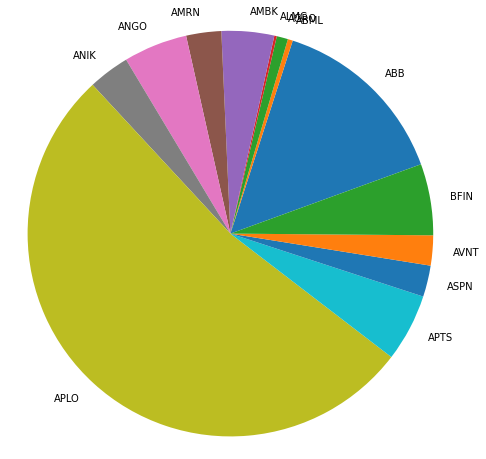

Оптимальный портфель с отношением к риску, равным 2.0627128075074257: 
ABB     0.145
ABML    0.004
ACCO    0.000
AGRO    0.009
ALMC    0.002
AMBK    0.042
AMJL    0.000
AMRN    0.028
ANGO    0.051
ANIK    0.033
APLO    0.528
APTS    0.054
ARCO    0.000
ASPN    0.025
ASTE    0.000
AVNT    0.024
BCPC    0.000
BFIN    0.057
BIOF    0.000
dtype: float64
Значение целевой функции (-E(x)+ bσ(x)): 0.0073640259910453644


In [80]:
x_opt, utility_function_opt = find_optimal_portfolio(calc_utility_function, 
                                                     (means, cov_mat, b), 
                                                     n_stocks=means.shape[0], 
                                                     decimals=3, 
                                                     short_sales=False)

# pie plot
fig1, ax1 = plt.subplots(figsize=(8, 8))
#print(np.where(x_opt != 0))
ax1.pie(x_opt[np.where(x_opt != 0)],
        labels=tickers20[np.where(x_opt != 0)],
        # autopct='%.2f%%',
        # shadow=True,
        startangle=20)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title("Распределение весов в портфеле")
plt.show()

# prints
print(f"Оптимальный портфель с отношением к риску, равным {b}: \n{pd.Series(x_opt, index = tickers20)}")
print(f"Значение целевой функции (-E(x)+ bσ(x)): {utility_function_opt}")


## 2. Оценка неопределенности оптимального портфеля в модели Марковица с заданным отношением к риску.

### 2.1 Задайте число наблюдений. С помощью генератора многомерного нормального распределения создайте выборку размера наблюдений из нормального распределения с вектором математических ожиданий и матрицей ковариаций. 

In [81]:
def generate_random_log_returns(means, cov_mat, T=30, seed=42):
    np.random.seed(seed)
    r_sample30_log_returns = np.random.multivariate_normal(means.to_numpy(dtype=float).T[0], 
                                                           cov_mat.to_numpy(dtype=float), 
                                                           size=T) # генератор многомерного нормального распределения

    r_sample_log_returns = pd.DataFrame(data = r_sample30_log_returns, columns=tickers20)
    # r_sample is a random sample of log returns
    return r_sample_log_returns

In [82]:
r_sample30_log_returns = generate_random_log_returns(means, cov_mat, T=30, seed=69)
r_sample30_log_returns

,ABB,ABML,ACCO,AGRO,ALMC,AMBK,AMJL,AMRN,ANGO,ANIK,APLO,APTS,ARCO,ASPN,ASTE,AVNT,BCPC,BFIN,BIOF
0,-0.012844,-0.106555,0.018092,0.009066,0.171646,-0.008161,0.013181,0.006626,0.000142,0.010282,-0.009333,0.029622,-0.022763,0.029313,0.027023,0.005496,-0.003044,-0.001454,-0.030621
1,-0.005746,0.111306,0.007573,-0.027892,0.063504,0.027681,-0.034292,0.029141,0.030133,-0.013824,-0.005105,-0.002748,-0.011295,0.018753,-0.021281,-0.004678,0.004283,-0.022063,0.021252
2,0.019343,-0.001748,0.018396,-0.016739,0.252617,0.006007,0.019737,0.004155,0.020039,0.001324,-0.004342,-0.030072,0.032631,0.026204,0.012318,0.011856,0.015731,-0.009672,-0.048248
3,0.002239,0.171022,-0.007428,-0.026035,0.344895,-0.000029,0.047956,0.006626,-0.004194,-0.008598,0.009057,-0.004487,0.032215,0.018689,-0.007746,-0.019462,0.001689,-0.000707,0.023143
4,0.003826,-0.087302,-0.001852,0.045468,0.159354,-0.033385,0.013339,-0.035176,-0.025117,-0.004834,0.016046,0.012478,0.023008,0.028664,0.008051,-0.004380,-0.001569,0.004885,-0.090044
5,0.001370,-0.012594,0.012364,0.011429,0.172984,0.018378,0.013588,0.007932,0.017469,0.028150,0.005519,0.023214,0.019178,0.020167,0.011884,0.008636,0.015427,-0.008726,-0.013882
6,-0.008212,0.063591,-0.004617,-0.016081,0.349172,-0.015652,0.001945,0.073750,-0.015221,0.004741,0.010278,0.014241,-0.009291,0.008521,-0.020633,-0.005023,-0.006850,0.004084,0.018907
7,-0.003736,-0.081395,-0.016681,-0.013960,0.336230,0.006354,-0.005752,0.023072,0.001913,0.005524,0.004233,-0.015735,-0.002775,0.018693,0.028084,-0.001696,0.002843,-0.005730,-0.009936
8,0.009232,0.028778,0.028249,0.026068,-0.030093,-0.020152,-0.020445,0.002896,-0.029000,0.014127,-0.004453,0.008899,-0.027009,-0.028763,0.005735,0.000855,-0.001287,-0.005067,0.082312
9,0.018138,0.008694,0.017779,-0.011613,-0.021102,-0.005163,-0.000043,0.003425,0.003573,-0.005376,-0.008772,-0.013635,0.037900,-0.028068,0.031434,-0.001523,0.016586,-0.006979,0.095075


### 2.2. По построенной выборке сделайте оценку Eest вектора математических ожиданий и оценку матрицы ковариаций. 

In [83]:
r_sample30_means = calc_sample_means(r_sample30_log_returns) # E_est
r_sample30_cov_mat = calc_sample_cov(r_sample30_log_returns, r_sample30_means, verbose=True) # sigma_est


19/19


In [84]:
r_sample30_means

,Sample mean (E)
ABB,0.001391
ABML,0.004331
ACCO,0.000188
AGRO,0.00108
ALMC,0.051581
AMBK,-0.002552
AMJL,0.003446
AMRN,0.011182
ANGO,0.001197
ANIK,-0.000107


In [85]:
r_sample30_cov_mat

,ABB,ABML,ACCO,AGRO,ALMC,AMBK,AMJL,AMRN,ANGO,ANIK,APLO,APTS,ARCO,ASPN,ASTE,AVNT,BCPC,BFIN,BIOF
ABB,0.000087,0.000019,0.000085,0.000059,-0.000381,0.000002,0.000063,-0.000073,0.000005,0.000017,-0.000008,-0.000024,0.000151,-0.000025,0.00011,0.000067,0.000084,0.0,0.000004
ABML,0.000019,0.005503,0.000221,-0.000527,0.001184,0.000166,0.000047,0.00051,-0.000032,0.000056,0.00006,0.00007,-0.000121,0.000016,-0.000198,-0.000136,0.000256,0.000062,0.000924
ACCO,0.000085,0.000221,0.000425,-0.000006,0.000396,-0.00004,-0.000011,-0.000212,0.00001,0.000073,-0.000025,0.000005,0.000011,-0.00005,0.000094,0.000098,0.000104,-0.000031,-0.00007
AGRO,0.000059,-0.000527,-0.000006,0.000381,-0.001058,-0.000108,0.000107,-0.000022,-0.000069,0.00005,-0.000008,0.000119,0.000143,0.000023,0.00016,0.000049,0.000045,0.00005,-0.000329
ALMC,-0.000381,0.001184,0.000396,-0.001058,0.025362,-0.000217,0.000546,0.000949,-0.000607,0.000013,0.000331,0.000055,-0.000837,0.000786,-0.000425,-0.000584,-0.000256,-0.000238,-0.00174
AMBK,0.000002,0.000166,-0.00004,-0.000108,-0.000217,0.000221,0.000013,-0.000001,0.000126,-0.000022,0.000007,-0.000019,0.000041,0.000027,0.000013,0.000022,0.000081,-0.000034,0.000294
AMJL,0.000063,0.000047,-0.000011,0.000107,0.000546,0.000013,0.000463,0.0001,-0.000056,0.000011,0.000017,0.000054,0.000248,0.000062,0.000241,0.000031,0.000109,0.000035,0.000162
AMRN,-0.000073,0.00051,-0.000212,-0.000022,0.000949,-0.000001,0.0001,0.000728,0.00001,0.000024,-0.000021,0.000155,0.000021,-0.000005,0.000029,-0.000072,-0.0,0.000048,0.000444
ANGO,0.000005,-0.000032,0.00001,-0.000069,-0.000607,0.000126,-0.000056,0.00001,0.000318,-0.000006,-0.000023,-0.00001,0.000153,0.000115,0.000029,0.000023,0.000072,-0.000033,0.000019
ANIK,0.000017,0.000056,0.000073,0.00005,0.000013,-0.000022,0.000011,0.000024,-0.000006,0.00013,-0.000009,0.000055,0.00008,0.000009,0.000064,0.000039,0.000064,0.000015,0.000032


### 2.3 Используя эти оценки решите задачу оптимизации (т.е. найдите выборочный оптимальный портфель с отношением к риску, равным b). Найдите и зафиксируйте веса портфеля и значение целевой функции.

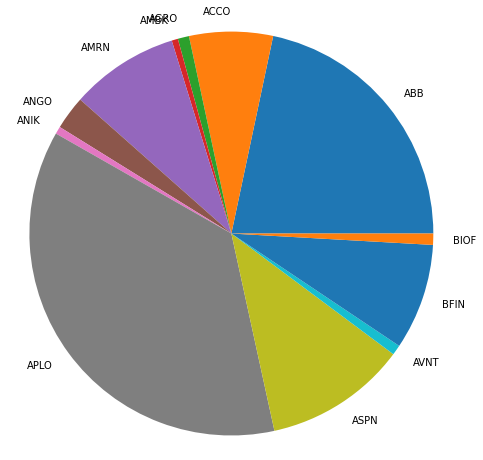

Оптимальный портфель с отношением к риску, равным 2.0627128075074257: 
ABB     0.217
ABML    0.000
ACCO    0.067
AGRO    0.009
ALMC    0.000
AMBK    0.005
AMJL    0.000
AMRN    0.087
ANGO    0.027
ANIK    0.006
APLO    0.367
APTS    0.000
ARCO    0.000
ASPN    0.114
ASTE    0.000
AVNT    0.008
BCPC    0.000
BFIN    0.085
BIOF    0.009
dtype: float64
Значение целевой функции (-E(x)+ bσ(x)): 0.005964438900665722


In [86]:
x_opt_r_sample30, utility_function_opt_r_sample30 = find_optimal_portfolio(calc_utility_function, 
                                                     (r_sample30_means, r_sample30_cov_mat, b), 
                                                     n_stocks=r_sample30_means.shape[0], 
                                                     decimals=3, 
                                                     short_sales=False)

# pie plot
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(x_opt_r_sample30[np.where(x_opt_r_sample30 != 0)],
        labels=tickers20[np.where(x_opt_r_sample30 != 0)],
        # autopct='%.2f%%',
        # shadow=True,
        startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title("Распределение весов в портфеле")
plt.show()

# prints
print(f"Оптимальный портфель с отношением к риску, равным {b}: \n{pd.Series(x_opt_r_sample30, index = tickers20)}")
print(f"Значение целевой функции (-E(x)+ bσ(x)): {utility_function_opt_r_sample30}")


### 2.4 Сравните два портфеля: истинный и выборочный. Оцените относительную ошибку в определении весов портфеля в норме Manhattan. Сделайте выводы. Сделайте сравнение в системе координат. 

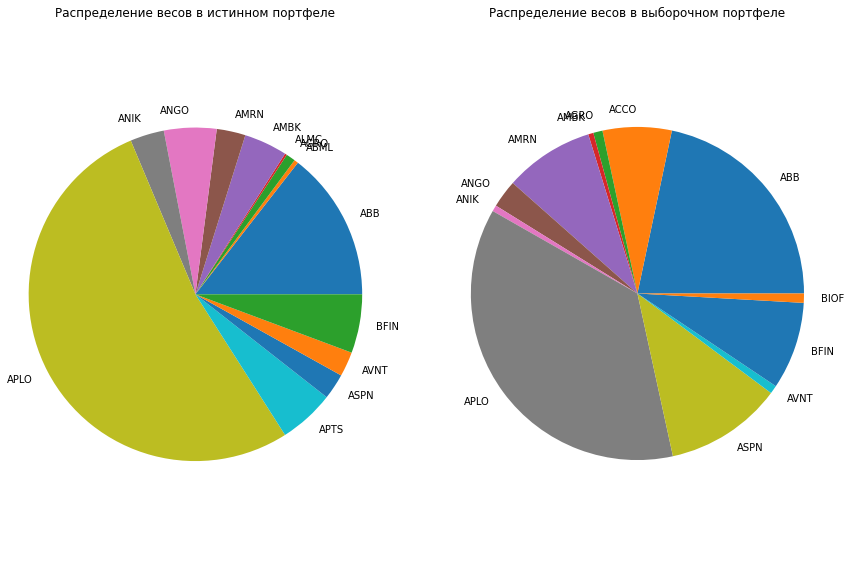

In [87]:
# pie plot
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].pie(x_opt[np.where(x_opt != 0)],
        labels=tickers20[np.where(x_opt != 0)],
        # autopct='%.2f%%',
        # shadow=True,
        startangle=0)
axs[0].axis('equal')
axs[0].set_title("Распределение весов в истинном портфеле")

axs[1].pie(x_opt_r_sample30[np.where(x_opt_r_sample30 != 0)],
        labels=tickers20[np.where(x_opt_r_sample30 != 0)],
        # autopct='%.2f%%',
        # shadow=True,
        startangle=0)
axs[1].axis('equal') 
axs[1].set_title("Распределение весов в выборочном портфеле")

plt.subplots_adjust(right=1.25)
#plt.title("Сравнение истинного и выборочного портфелей")
plt.show()


Видно, что в обоих портфелях актив APLO имеет самый большой вес. Также актив ABB является одним из наиболее больших. 
Вычислим разницу в весах:

In [88]:
pd.Series(x_opt_r_sample30 - x_opt, index = tickers20).abs().sort_values()

BCPC    0.000
AGRO    0.000
AMJL    0.000
ASTE    0.000
ARCO    0.000
ALMC    0.002
ABML    0.004
BIOF    0.009
AVNT    0.016
ANGO    0.024
ANIK    0.027
BFIN    0.028
AMBK    0.037
APTS    0.054
AMRN    0.059
ACCO    0.067
ABB     0.072
ASPN    0.089
APLO    0.161
dtype: float64

Веса активов BCPC, AGRO, AMJL, ASTE, ARCO совпали. Остальные веса заметно отличаются

Относительная ошибка в норме Manhattan составляет: 0.6477045908183634


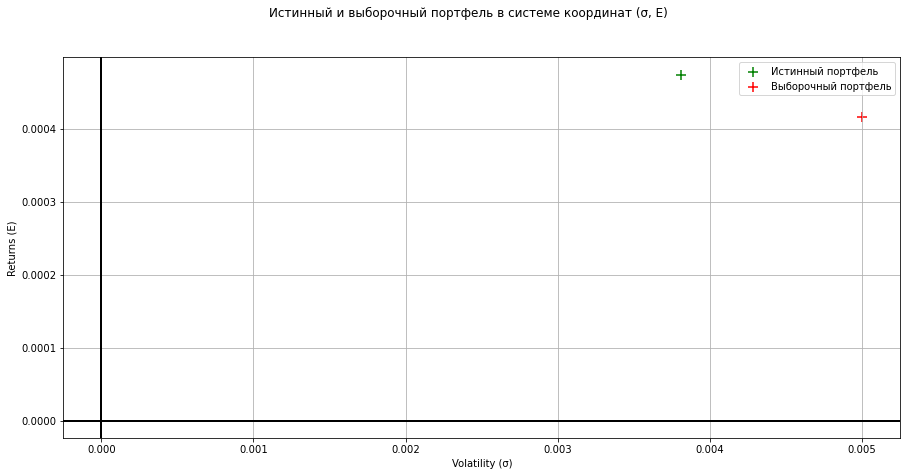

In [89]:
# расчеты доходности и риска
x_opt_return = calc_portfolio_return(x_opt, means)
x_opt_volatility = calc_portfolio_volatility(x_opt, cov_mat)

x_opt_r_sample30_return = calc_portfolio_return(x_opt_r_sample30, means)
x_opt_r_sample30_volatility = calc_portfolio_volatility(x_opt_r_sample30, cov_mat)

# plots
fig, ax = plt.subplots(figsize=(15, 7))
fig.suptitle("Истинный и выборочный портфель в системе координат (σ, E)")
ax.axhline(linewidth=2, color='black')
ax.axvline(linewidth=2, color='black')

ax.scatter(x_opt_volatility, x_opt_return, color="g", marker="+", s=100, label="Истинный портфель")    
ax.scatter(x_opt_r_sample30_volatility, x_opt_r_sample30_return, color="r", marker="+", s=100, label="Выборочный портфель")       

ax.set_xlabel("Volatility (σ)")
ax.set_ylabel("Returns (E)")
ax.grid()
ax.legend()
fig.show()

# manhattan error
print("Относительная ошибка в норме Manhattan составляет:", calc_relative_cityblock_error(x_opt, x_opt_r_sample30))

И по графику, и по значению относительной ошибки видно, что портфели отличаются друг от друга.

### 2.5. Повторите эксперимент 40 раз и оцените среднюю относительную ошибку по 40 экспериментам. Сделайте выводы.  Сделайте сравнение в системе координат (σ, E). 

19/19
Средняя относительная ошибка по 40 повторениям эксперимента: 0.5794660678642716


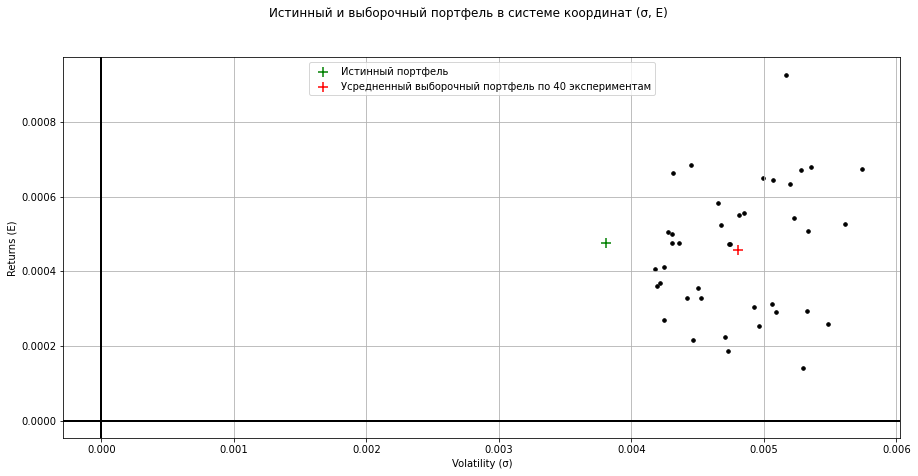

In [90]:
S = 40
# plot
fig, ax = plt.subplots(figsize=(15, 7))
fig.suptitle("Истинный и выборочный портфель в системе координат (σ, E)")
ax.axhline(linewidth=2, color='black')
ax.axvline(linewidth=2, color='black')
ax.scatter(x_opt_volatility, x_opt_return, color="g", marker="+", s=100, label="Истинный портфель")      

# main loop
x_opt_r_sample_all = [] # оптимальные портфели для каждого из S экспериментов 
rel_errors = [] # относительные ошибки
x_opt_r_sample_returns = [] # доходность каждого из S портфелей
x_opt_r_sample_volatilities = [] # риск каждого из S портфелей

for i in range(S):
    # r_sample name is used exclusively in this loop
    
    # generate random log returns:
    r_sample_log_returns = generate_random_log_returns(means, cov_mat, T=30, seed=i) 
    
    # calculate sample means and sample covariance matrix
    r_sample_means = calc_sample_means(r_sample_log_returns) # E_est
    r_sample_cov_mat = calc_sample_cov(r_sample_log_returns, r_sample_means, verbose=True) # sigma_est
    
    # find optimal portfolio
    x_opt_r_sample, utility_function_opt_r_sample = find_optimal_portfolio(calc_utility_function, 
                                                     (r_sample_means, r_sample_cov_mat, b), 
                                                     n_stocks=r_sample_means.shape[0], 
                                                     decimals=3, 
                                                     short_sales=False)
    
    # calculate and store the value of error
    rel_errors.append(calc_relative_cityblock_error(x_opt, x_opt_r_sample)) 
    
    # store return and volatility of an optimal portfolio
    x_opt_r_sample_returns.append(calc_portfolio_return(x_opt_r_sample, means))
    x_opt_r_sample_volatilities.append(calc_portfolio_volatility(x_opt_r_sample, cov_mat))
    
    # I don't really remember
    x_opt_r_sample_all.append(np.array(x_opt_r_sample))    
    
    # plot
    ax.scatter(x_opt_r_sample_volatilities[i], x_opt_r_sample_returns[i], 
           color="black", marker=".", s=50) # label?
    
x_opt_r_sample_all = np.array(x_opt_r_sample_all)

# plot
ax.scatter(np.array(x_opt_r_sample_volatilities).mean(), np.array(x_opt_r_sample_returns).mean(), 
           color="red", marker="+", s=100, label=f"Усредненный выборочный портфель по {S} экспериментам")

ax.set_xlabel("Volatility (σ)")
ax.set_ylabel("Returns (E)")
ax.grid()
ax.legend()
fig.show()

first_error = np.array(rel_errors).mean()
print(f"Средняя относительная ошибка по {S} повторениям эксперимента: {np.array(rel_errors).mean()}")

Нетрудно заметить, что при нескольких экспериментах, усредненный выборочный портфель находится ближе к истинному, то есть уменьшилась относительная ошибка.

### 2.6  Предположите, что нам известны точные значения математических ожиданий. Повторите пп. 2.2-2.5. используя оценку только матрицы ковариаций (т.е. решайте задачу оптимизации). Сравните точность этих портфелей и портфелей п.2.3


Построим выборочный портфель, используя истинную доходность в целевой функции

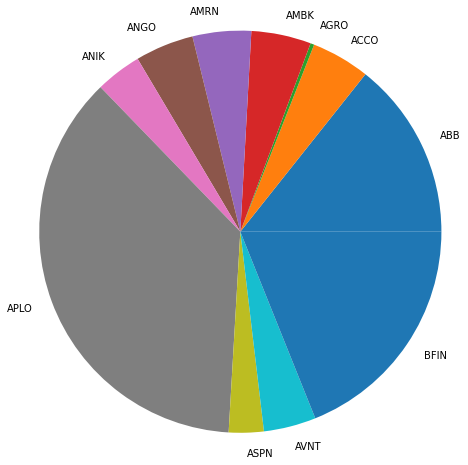

Оптимальный портфель с отношением к риску, равным 2.0627128075074257: 
ABB     0.143
ABML    0.000
ACCO    0.047
AGRO    0.003
ALMC    0.000
AMBK    0.048
AMJL    0.000
AMRN    0.047
ANGO    0.047
ANIK    0.037
APLO    0.368
APTS    0.000
ARCO    0.000
ASPN    0.028
ASTE    0.000
AVNT    0.042
BCPC    0.000
BFIN    0.189
BIOF    0.000
dtype: float64
Значение целевой функции (-E(x)+ bσ_est(x)): 0.00683723799766343


In [91]:
x_opt_r_sample30_2, utility_function_opt_r_sample30_2 = find_optimal_portfolio(calc_utility_function, 
                                                     (means, r_sample30_cov_mat, b), 
                                                     n_stocks=means.shape[0], 
                                                     decimals=3, 
                                                     short_sales=False)

# pie plot
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(x_opt_r_sample30_2[np.where(x_opt_r_sample30_2 != 0)],
        labels=tickers20[np.where(x_opt_r_sample30_2 != 0)],
        # autopct='%.2f%%',
        # shadow=True,
        startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title("Распределение весов в портфеле")
plt.show()

# prints
print(f"Оптимальный портфель с отношением к риску, равным {b}: \n{pd.Series(x_opt_r_sample30_2, index = tickers20)}")
print(f"Значение целевой функции (-E(x)+ bσ_est(x)): {utility_function_opt_r_sample30_2}")


Сравним веса истинного портфеля, выборочного портфеля, выборочного портфеля с истинной доходностью

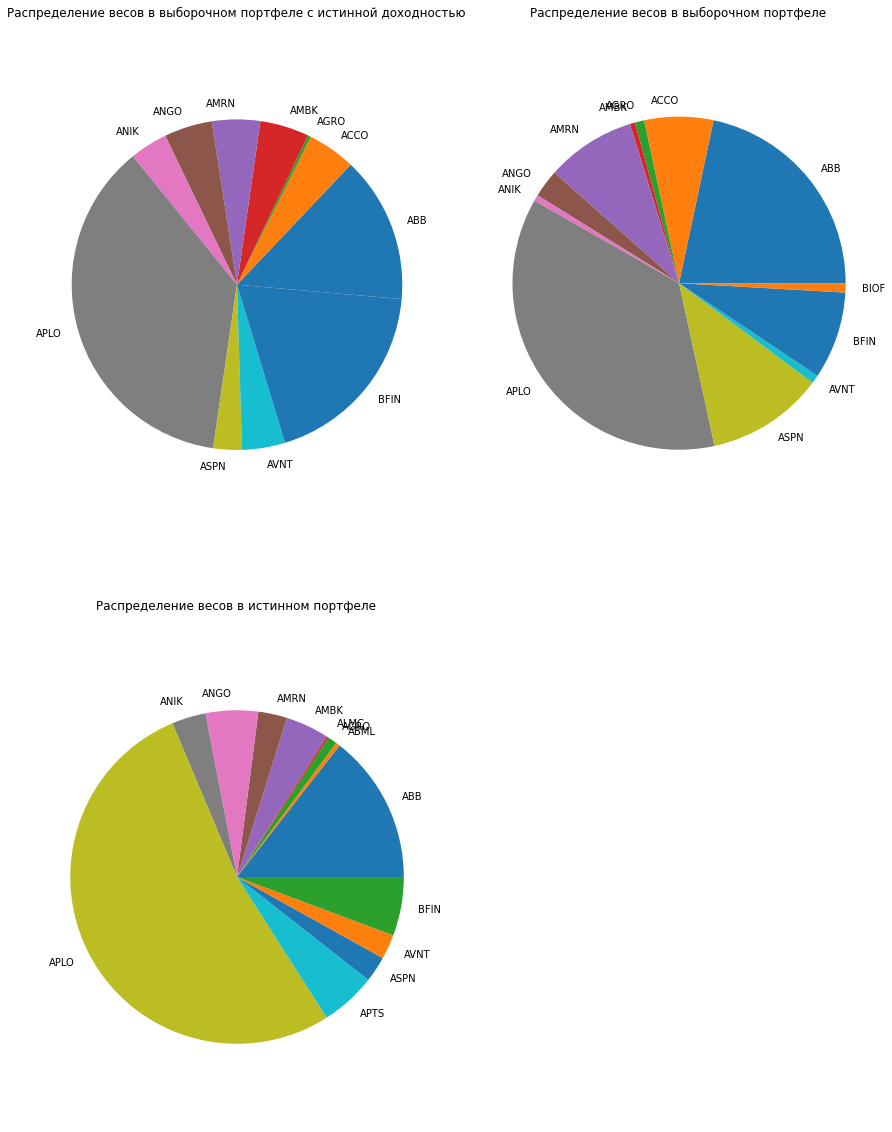

In [92]:
fig, axs = plt.subplots(2, 2, figsize=(10, 20))


axs[1][0].pie(x_opt[np.where(x_opt != 0)],
        labels=tickers20[np.where(x_opt != 0)],
        # autopct='%.2f%%',
        # shadow=True,
        startangle=0)
axs[1][0].axis('equal')
axs[1][0].set_title("Распределение весов в истинном портфеле\n")

axs[0][1].pie(x_opt_r_sample30[np.where(x_opt_r_sample30 != 0)],
        labels=tickers20[np.where(x_opt_r_sample30 != 0)],
        # autopct='%.2f%%',
        # shadow=True,
        startangle=0)
axs[0][1].axis('equal') 
axs[0][1].set_title("Распределение весов в выборочном портфеле\n")

axs[0][0].pie(x_opt_r_sample30_2[np.where(x_opt_r_sample30_2 != 0)],
        labels=tickers20[np.where(x_opt_r_sample30_2 != 0)],
        # autopct='%.2f%%',
        # shadow=True,
        startangle=-5)
axs[0][0].axis('equal') 
axs[0][0].set_title("Распределение весов в выборочном портфеле c истинной доходностью\n")
fig.delaxes(axs[1][1])


plt.subplots_adjust(right=1.25)
#plt.title("Сравнение истинного и выборочного портфелей")
plt.show()

Выборочный портфель с "истинной" доходностью по распределению весов относительно похож на выборочный портфель из п. 2.3. Во всех портфелях APLO имеет наибольший вес.

Изобразим портфели на графике

Относительная ошибка в норме Manhattan между истинным портфелем и выборочным портфелем: 0.6477045908183634
Относительная ошибка в норме Manhattan между истинным портфелем и выборочным портфелем с истинной доходностью: 0.4600798403193613


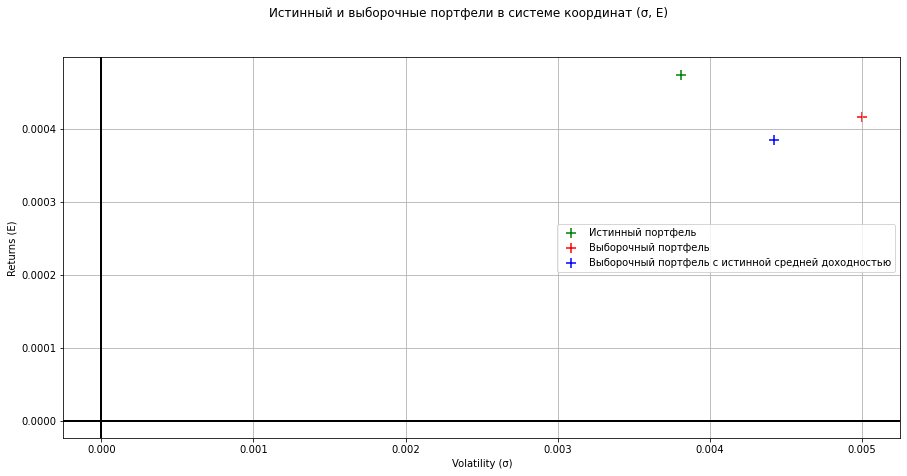

In [93]:
# расчеты доходности и риска
x_opt_r_sample30_return_2 = calc_portfolio_return(x_opt_r_sample30_2, means)
x_opt_r_sample30_volatility_2 = calc_portfolio_volatility(x_opt_r_sample30_2, cov_mat)

# plots
fig, ax = plt.subplots(figsize=(15, 7))
fig.suptitle("Истинный и выборочные портфели в системе координат (σ, E)")
ax.axhline(linewidth=2, color='black')
ax.axvline(linewidth=2, color='black')

ax.scatter(x_opt_volatility, x_opt_return, color="g", marker="+", s=100, label="Истинный портфель")    
ax.scatter(x_opt_r_sample30_volatility, x_opt_r_sample30_return, color="r", marker="+", s=100, label="Выборочный портфель")       
ax.scatter(x_opt_r_sample30_volatility_2, x_opt_r_sample30_return_2, color="blue", marker="+", s=100, label="Выборочный портфель c истинной средней доходностью")       

ax.set_xlabel("Volatility (σ)")
ax.set_ylabel("Returns (E)")
ax.grid()
ax.legend()
fig.show()

# manhattan error
print("Относительная ошибка в норме Manhattan между истинным портфелем и выборочным портфелем:", calc_relative_cityblock_error(x_opt, x_opt_r_sample30))
print("Относительная ошибка в норме Manhattan между истинным портфелем и выборочным портфелем с истинной доходностью:", calc_relative_cityblock_error(x_opt, x_opt_r_sample30_2))


Относительная ошибка в случае выборочного портфеля с истинной доходностью немного меньше, чем при выборочном портфеле из п. 2.3.

Посчитаем средний выборочный портфель по 40 экспериментам, используя истинную доходность в целевой функции

19/19
Средняя относительная ошибка по 40 повторениям эксперимента для выборочного портфеля: 0.5794660678642716  
Средняя относительная ошибка по 40 повторениям эксперимента для выборочного портфеля с истинной доходностью: 0.5100299401197604  


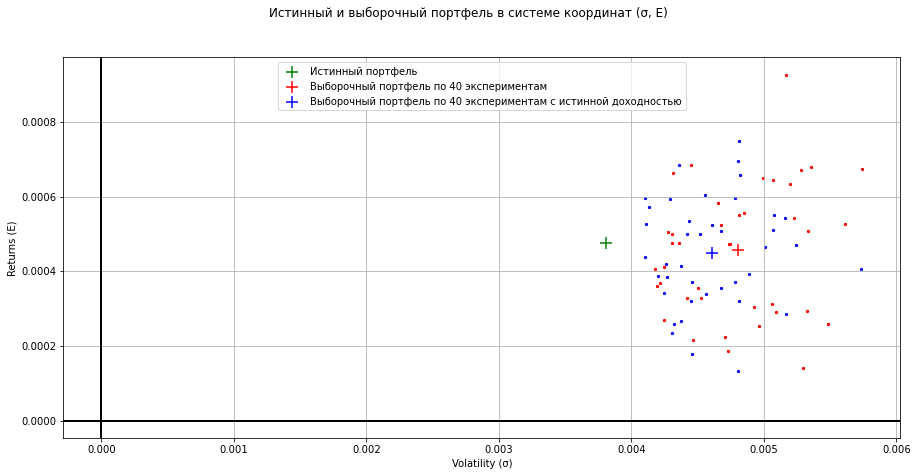

In [94]:
S = 40
# plot
fig, ax = plt.subplots(figsize=(15, 7))
fig.suptitle("Истинный и выборочный портфель в системе координат (σ, E)")
ax.axhline(linewidth=2, color='black')
ax.axvline(linewidth=2, color='black')
ax.scatter(x_opt_volatility, x_opt_return, color="g", marker="+", s=150, label="Истинный портфель")      

# main loop
x_opt_r_sample_all = [] # оптимальные портфели для каждого из S экспериментов 
rel_errors = [] # относительные ошибки
x_opt_r_sample_returns = [] # доходность каждого из S портфелей
x_opt_r_sample_volatilities = [] # риск каждого из S портфелей

x_opt_r_sample_all_2 = []  
rel_errors_2 = [] 
x_opt_r_sample_returns_2 = [] 
x_opt_r_sample_volatilities_2 = [] 

for i in range(S):
    # r_sample name is used exclusively in this loop
    
    # generate random log returns:
    r_sample_log_returns = generate_random_log_returns(means, cov_mat, T=30, seed=i) 
    
    # calculate sample means and sample covariance matrix
    r_sample_means = calc_sample_means(r_sample_log_returns) # E_est
    r_sample_cov_mat = calc_sample_cov(r_sample_log_returns, r_sample_means, verbose=True) # sigma_est
    
    # find optimal portfolio
    x_opt_r_sample, utility_function_opt_r_sample = find_optimal_portfolio(calc_utility_function, 
                                                     (r_sample_means, r_sample_cov_mat, b), 
                                                     n_stocks=r_sample_means.shape[0], 
                                                     decimals=3, 
                                                     short_sales=False)
    x_opt_r_sample_2, utility_function_opt_r_sample_2 = find_optimal_portfolio(calc_utility_function, 
                                                     (means, r_sample_cov_mat, b), 
                                                     n_stocks=r_sample_means.shape[0], 
                                                     decimals=3, 
                                                     short_sales=False)
    
    # calculate and store the value of error
    rel_errors.append(calc_relative_cityblock_error(x_opt, x_opt_r_sample)) 
    rel_errors_2.append(calc_relative_cityblock_error(x_opt, x_opt_r_sample_2)) 

    # store return and volatility of an optimal portfolio
    x_opt_r_sample_returns.append(calc_portfolio_return(x_opt_r_sample, means))
    x_opt_r_sample_volatilities.append(calc_portfolio_volatility(x_opt_r_sample, cov_mat))
    
    x_opt_r_sample_returns_2.append(calc_portfolio_return(x_opt_r_sample_2,  means))
    x_opt_r_sample_volatilities_2.append(calc_portfolio_volatility(x_opt_r_sample_2,  cov_mat))
    # I don't really remember
    x_opt_r_sample_all.append(np.array(x_opt_r_sample))    
    x_opt_r_sample_all_2.append(np.array(x_opt_r_sample_2))    

    
    # plot
    ax.scatter(x_opt_r_sample_volatilities[i], x_opt_r_sample_returns[i], 
           color="red", marker=".", s=20) # label?
    ax.scatter(x_opt_r_sample_volatilities_2[i], x_opt_r_sample_returns_2[i], 
       color="blue", marker=".", s=20)
    
x_opt_r_sample_all = np.array(x_opt_r_sample_all)
x_opt_r_sample_all_2 = np.array(x_opt_r_sample_all_2)
# plot
ax.scatter(np.array(x_opt_r_sample_volatilities).mean(), np.array(x_opt_r_sample_returns).mean(), 
           color="red", marker="+", s=150, label=f"Выборочный портфель по {S} экспериментам")
ax.scatter(np.array(x_opt_r_sample_volatilities_2).mean(), np.array(x_opt_r_sample_returns_2).mean(), 
           color="blue", marker="+", s=150, label=f"Выборочный портфель по {S} экспериментам c истинной доходностью")
ax.set_xlabel("Volatility (σ)")
ax.set_ylabel("Returns (E)")
ax.grid()
ax.legend()
fig.show()

print(f"Средняя относительная ошибка по {S} повторениям эксперимента для выборочного портфеля: {np.array(rel_errors).mean()}  ")
print(f"Средняя относительная ошибка по {S} повторениям эксперимента для выборочного портфеля с истинной доходностью: {np.array(rel_errors_2).mean()}  ")


Средние относительные ошибки выборочных портфелей практически одинаковы, хотя доходность и риск среднего выборочного портфеля с истинной доходностью ближе к доходности истинного портфеля.

## 3. Оценка неопределенности оптимального CVaR портфеля 

### 3.1 Уровень значимости β выбран 0,95. Число наблюдений T. Используя сгенерированные наблюдения из п.2.1 решите задачу ЛП для определения оптимального портфеля. Найдите и зафиксируйте веса портфеля и значение целевой функции CVaR.  

In [95]:
returns30 = r_sample30_log_returns.to_numpy() #sample generated in task 2.1
T = returns30.shape[0]
N = returns30.shape[1]
beta = 0.95 #significance level

def obj_func(vec_ut_x_alpha, T, beta):
    return vec_ut_x_alpha[N+T] + 1/(T-T*beta)*np.sum(vec_ut_x_alpha[:T])

def func(vec_ut_x_alpha, returns30, t): #RX + alpha + ut
    RX = np.dot(returns30[t], vec_ut_x_alpha[T:N+T])
    return RX + vec_ut_x_alpha[N+T] + vec_ut_x_alpha[t]

def CVaR_optimization(beta, returns30, func):
    alpha  = 0 
    x = np.ones(N)/N
    ut = - np.dot(returns30,  x) - alpha #dummy variables
    
    vec_ut_x_alpha = np.zeros(N+T+1)
    vec_ut_x_alpha[:T] = ut
    vec_ut_x_alpha[T:N+T] = x
    vec_ut_x_alpha[N+T] = alpha
    
    alpha_bound = ((-inf, inf),)
    x_bound = ((0, 1.1),)*N 
    ut_bound = ((0, inf),)*T 
    
    constraints = list()
    constraints.append({'type': 'eq', 'fun': lambda x: sum(x[T:N+T])-1}) #sum(xi) = 1
    
    for t in range(0, T):
        constraints.append({'type': 'ineq', 'fun': func, 'args': (returns30, t)}) #RX + alpha + ut >= 0

    return minimize(obj_func, vec_ut_x_alpha, args=(T, beta), method='SLSQP', #МНК
                    constraints=constraints, bounds=ut_bound+x_bound+alpha_bound).x


In [96]:

ans = CVaR_optimization(beta, returns30, func)
weights_cvar = ans[T:N+T]
cvar_alpha  = round(ans[N+T], 5)


Распределение весов, в получившемся портфеле:

In [97]:

weights_cvar


array([1.94772439e-01, 3.63319551e-15, 1.08519494e-01, 1.71527101e-15,
       8.60050352e-03, 0.00000000e+00, 3.15143838e-02, 9.23916012e-02,
       4.96480794e-03, 0.00000000e+00, 3.79848218e-01, 0.00000000e+00,
       1.58496235e-16, 1.74250020e-01, 1.00967176e-15, 0.00000000e+00,
       3.50091644e-16, 5.13853242e-03, 9.54440900e-16])

In [98]:
print('Alpha полученного CVaR портфеля:' , cvar_alpha)


Alpha полученного CVaR портфеля: 0.00265


Визуализируем распределение весов между компаниями в этом портфеле:

In [99]:
def weights_visualization(weights, title):
    weights_data = pd.DataFrame(index = tickers20, columns = ['weight'])
    weights_data['weight'] = weights

    plt.figure(figsize = (13,6))
    x = np.arange(weights_data.shape[0])
    x_values = weights_data.index
    plt.xlabel('Акция', fontsize = 13)
    plt.ylabel('Вес', fontsize = 13)
    plt.bar(x, height = weights_data['weight'], color='teal')
    plt.xticks(x, x_values, rotation='50')
    plt.yscale("log")
    plt.gca().yaxis.set_major_formatter(ScalarFormatter())
    plt.title(title, fontsize = 14)
    plt.grid()


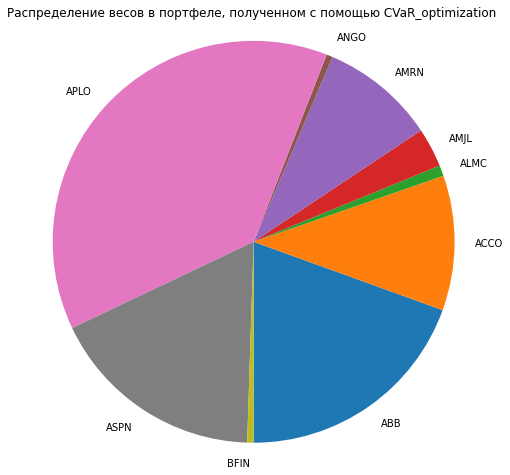

In [100]:
# pie plot
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(weights_cvar[np.where(weights_cvar > 1e-10)],
        labels=tickers20[np.where(weights_cvar > 1e-10)],
        # autopct='%.2f%%',
        # shadow=True,
        startangle=-90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Распределение весов в портфеле, полученном с помощью CVaR_optimization")
plt.show()


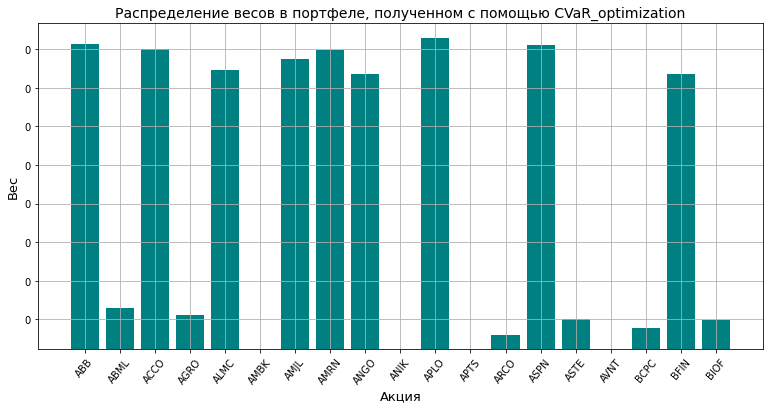

In [101]:
weights_visualization(weights_cvar, "Распределение весов в портфеле, полученном с помощью CVaR_optimization")

### 3.2 Сравните два портфеля: истинный и найденный в п.3.1.  Оцените относительную ошибку в определении весов портфеля в норме Manhattan. Сравните с ошибкой портфеля из п. 2.3

Визуализируем распределение весов истинном портфеле (получен в п.1):

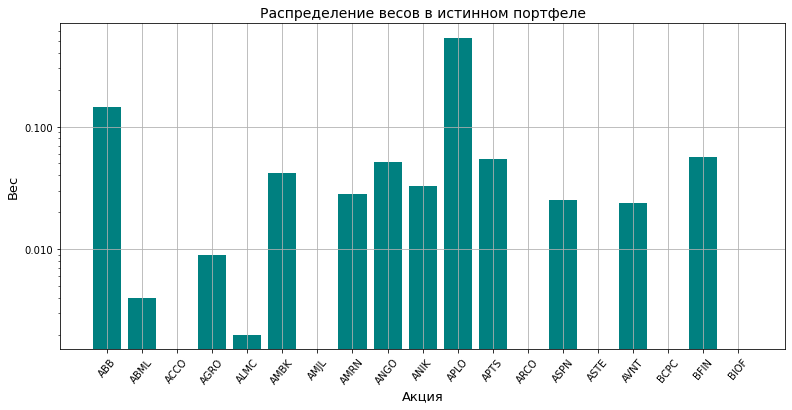

In [102]:

weights_visualization(x_opt, "Распределение весов в истинном портфеле")


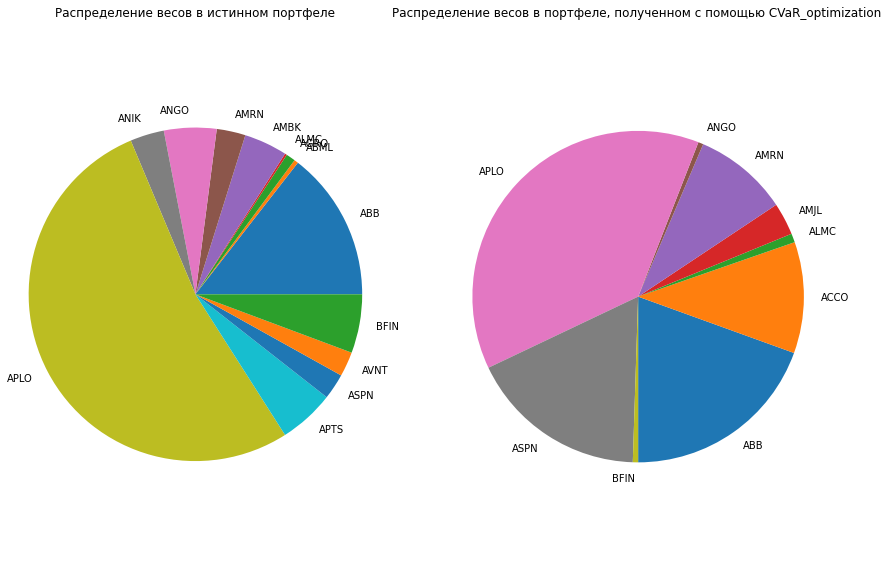

In [103]:
# pie plot
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].pie(x_opt[np.where(x_opt != 0)],
        labels=tickers20[np.where(x_opt != 0)],
        # autopct='%.2f%%',
        # shadow=True,
        startangle=0)
axs[0].axis('equal')
axs[0].set_title("Распределение весов в истинном портфеле")

axs[1].pie(weights_cvar[np.where(weights_cvar > 1e-10)],
        labels=tickers20[np.where(weights_cvar > 1e-10)],
        # autopct='%.2f%%',
        # shadow=True,
        startangle=-90)
axs[1].axis('equal') 
axs[1].set_title("Распределение весов в портфеле, полученном с помощью CVaR_optimization")

plt.subplots_adjust(right=1.25)
#plt.title("Сравнение истинного и выборочного портфелей")
plt.show()

В обоих портфелях лидирующую позицию по весу занимает актив APLO. Однако портфели довольно сильно отличаются по составу.

Оценим относительную ошибку в определении весов этих двух портфелей в норме Manhattan (L1 норма Минковского):

In [104]:
norm1 = calc_relative_cityblock_error(x_opt,  x_opt_r_sample30)
norm2 = calc_relative_cityblock_error(x_opt, weights_cvar)

print('Относительная ошибка в норме Manhattan для портфеля из п.2.3 :', norm1)
print('Относительная ошибка в норме Manhattan для портфеля, полученного с помощью CVaR_optimization:', norm2)

Относительная ошибка в норме Manhattan для портфеля из п.2.3 : 0.6477045908183634
Относительная ошибка в норме Manhattan для портфеля, полученного с помощью CVaR_optimization: 0.8204559715820305


Изобразим портфели на карте активов:

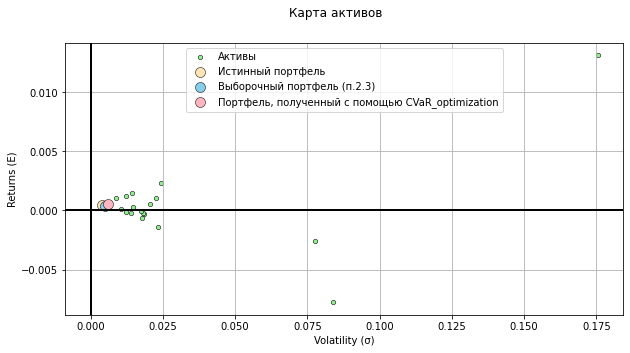

In [105]:
#Координаты для активов
sample_stds = np.diag(cov_mat)**0.5
sample_means = calc_sample_means(log_returns)
#Координаты для истинного портфеля
E_x_opt = calc_portfolio_return(x_opt, means)
std_x_opt = calc_portfolio_volatility(x_opt, cov_mat)
#Координаты для выборочного оптимального портфеля из п.2.3
E_x_opt_r_sample30 = calc_portfolio_return(x_opt_r_sample30, means)
std_x_opt_r_sample30 = calc_portfolio_volatility(x_opt_r_sample30, cov_mat)
#Координаты для портфеля, полученного с помощью CVaR_optimization
E_weights_cvar = calc_portfolio_return(weights_cvar, means)
std_weights_cvar = calc_portfolio_volatility(weights_cvar, cov_mat)

#График
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle("Карта активов")
ax.axhline(linewidth=2, color='black')
ax.axvline(linewidth=2, color='black')

ax.scatter(sample_stds, sample_means, marker="o", 
           color='lightgreen', edgecolors= 'black', linewidth=0.5, s=20, label='Активы')
ax.scatter(std_x_opt, E_x_opt, marker="o", color='moccasin',
           edgecolors= 'black', linewidth=0.5, s=100, label="Истинный портфель")
ax.scatter(std_x_opt_r_sample30, E_x_opt_r_sample30, marker="o", color='skyblue',
           edgecolors= 'black', linewidth=0.5, s=100, label="Выборочный портфель (п.2.3)")
ax.scatter(std_weights_cvar, E_weights_cvar, marker="o", color='lightpink',
           edgecolors= 'black', linewidth=0.5, s=100, label="Портфель, полученный с помощью CVaR_optimization")

ax.set_xlabel("Volatility (σ)")
ax.set_ylabel("Returns (E)")
ax.grid()
ax.legend()
fig.show()



Относительная ошибка в норме Manhattan для СVaR портфеля (0.8204) больше, чем ошибка для выборочного портфеля из п.2.3 (0.6477). Исходя из этого можно сделать вывод, что портфель, полученный с помощью CVaR_optimization, дальше от истинного (но разница не так велика). На карте активов портфели располагается близко друг к другу.

### 3.3. Повторите эксперимент S раз и оцените среднюю относительную ошибку по S повторениям эксперимента. Сделайте выводы.  Сравните с ошибкой из п. 2.5 

19/19
Средняя относительная ошибка по 40 повторениям эксперимента CVaR портфеля: 0.7601667742395428  
Средняя относительная ошибка по 40 повторениям эксперимента из 2.5: 0.5794660678642716  


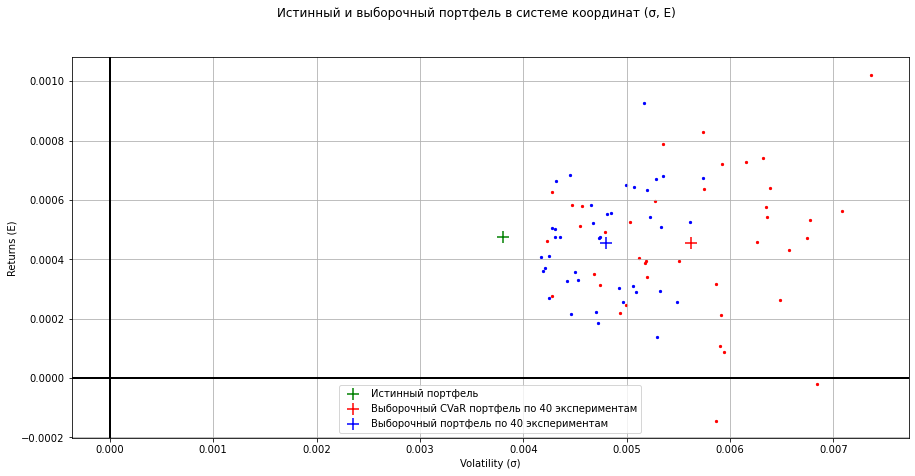

In [106]:
S = 40
# plot
fig, ax = plt.subplots(figsize=(15, 7))
fig.suptitle("Истинный и выборочный портфель в системе координат (σ, E)")
ax.axhline(linewidth=2, color='black')
ax.axvline(linewidth=2, color='black')
ax.scatter(x_opt_volatility, x_opt_return, color="g", marker="+", s=150, label="Истинный портфель")      

# main loop
x_opt_r_sample_all = [] # оптимальные портфели для каждого из S экспериментов 
rel_errors = [] # относительные ошибки
x_opt_r_sample_returns = [] # доходность каждого из S портфелей
x_opt_r_sample_volatilities = [] # риск каждого из S портфелей

x_opt_r_sample_all_2 = []  
rel_errors_2 = [] 
x_opt_r_sample_returns_2 = [] 
x_opt_r_sample_volatilities_2 = [] 
for i in range(S):

    r_sample_log_returns = generate_random_log_returns(means, cov_mat, T=30, seed=i) 
    returns30 = r_sample_log_returns.to_numpy()
    ans = CVaR_optimization(beta, returns30, func)
    x_opt_r_sample = ans[T:N+T]
    cvar_alpha  = round(ans[N+T], 5)

    
    # calculate sample means and sample covariance matrix
    r_sample_means = calc_sample_means(r_sample_log_returns) # E_est
    r_sample_cov_mat = calc_sample_cov(r_sample_log_returns, r_sample_means, verbose=True) # sigma_est
    
    # find optimal portfolio
    x_opt_r_sample_2, utility_function_opt_r_sample = find_optimal_portfolio(calc_utility_function, 
                                                     (r_sample_means, r_sample_cov_mat, b), 
                                                     n_stocks=r_sample_means.shape[0], 
                                                     decimals=3, 
                                                     short_sales=False)


    
    r_sample_means = calc_sample_means(r_sample_log_returns) 
    r_sample_cov_mat = calc_sample_cov(r_sample_log_returns, r_sample_means, verbose=True) 
        
    # calculate and store the value of error
    rel_errors.append(calc_relative_cityblock_error(x_opt, x_opt_r_sample)) 
    rel_errors_2.append(calc_relative_cityblock_error(x_opt, x_opt_r_sample_2)) 

    # store return and volatility of an optimal portfolio
    x_opt_r_sample_returns.append(calc_portfolio_return(x_opt_r_sample, means))
    x_opt_r_sample_volatilities.append(calc_portfolio_volatility(x_opt_r_sample, cov_mat))
    
    x_opt_r_sample_returns_2.append(calc_portfolio_return(x_opt_r_sample_2, means))
    x_opt_r_sample_volatilities_2.append(calc_portfolio_volatility(x_opt_r_sample_2, cov_mat))
    
    # I don't really remember
    x_opt_r_sample_all.append(np.array(x_opt_r_sample))  
    x_opt_r_sample_all_2.append(np.array(x_opt_r_sample_2))    
    
    # plot
    ax.scatter(x_opt_r_sample_volatilities[i], x_opt_r_sample_returns[i], 
           color="red", marker=".", s=20) # label?
    ax.scatter(x_opt_r_sample_volatilities_2[i], x_opt_r_sample_returns_2[i], 
       color="blue", marker=".", s=20)
    
x_opt_r_sample_all = np.array(x_opt_r_sample_all)
x_opt_r_sample_all_2 = np.array(x_opt_r_sample_all_2)

# plot
ax.scatter(np.array(x_opt_r_sample_volatilities).mean(), np.array(x_opt_r_sample_returns).mean(), 
           color="red", marker="+", s=150, label=f"Выборочный CVaR портфель по {S} экспериментам")
ax.scatter(np.array(x_opt_r_sample_volatilities_2).mean(), np.array(x_opt_r_sample_returns_2).mean(), 
           color="blue", marker="+", s=150, label=f"Выборочный портфель по {S} экспериментам")
ax.set_xlabel("Volatility (σ)")
ax.set_ylabel("Returns (E)")
ax.grid()
ax.legend()
fig.show()

print(f"Средняя относительная ошибка по {S} повторениям эксперимента CVaR портфеля: {np.array(rel_errors).mean()}  ")
print(f"Средняя относительная ошибка по {S} повторениям эксперимента из 2.5: {np.array(rel_errors_2).mean()}  ")


Средний выборочный портфель по 40 экспериментам находится дальше к истинному, чем средний выборочный CVaR портфель. Но доходности у них у всех практически одинаковые.